In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

bank=pd.read_csv("bank-full.csv",";")
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [168]:
print("Total number of people contacted during the campaign",str(len(bank)))

Total number of people contacted during the campaign 41188


# Analyzing data

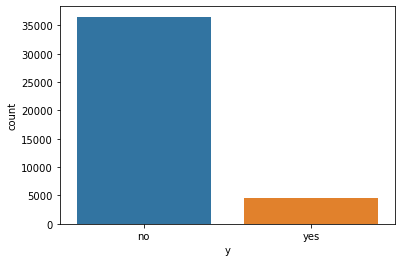

In [169]:
sns.countplot(x="y",data=bank)

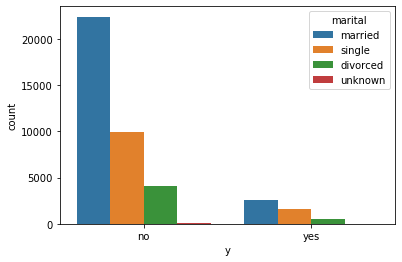

In [170]:
sns.countplot(x="y",hue="marital",data=bank)

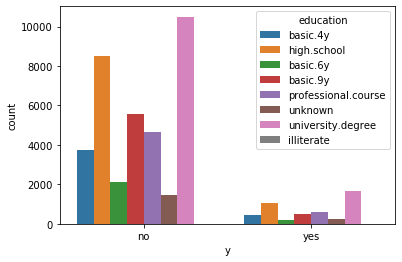

In [171]:
sns.countplot(x="y",hue="education",data=bank)

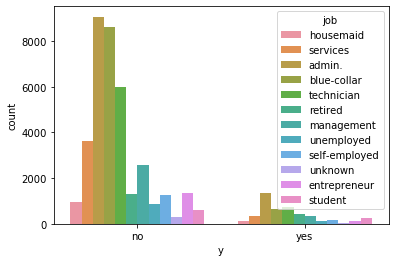

In [172]:
sns.countplot(x="y",hue="job",data=bank)

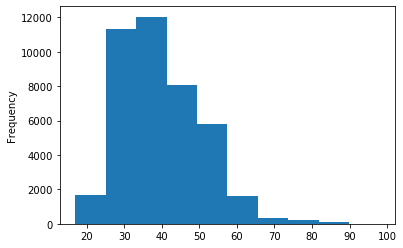

In [173]:
bank["age"].plot.hist()

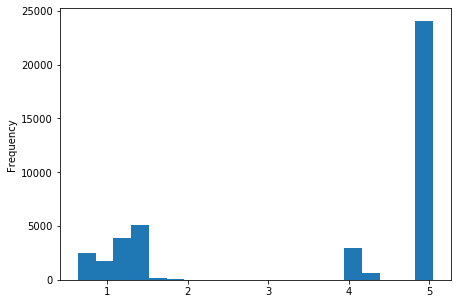

In [174]:
bank["euribor3m"].plot.hist(bins=20,figsize=(7,5))

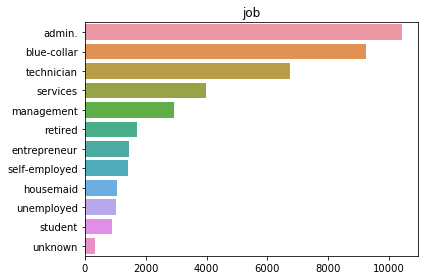

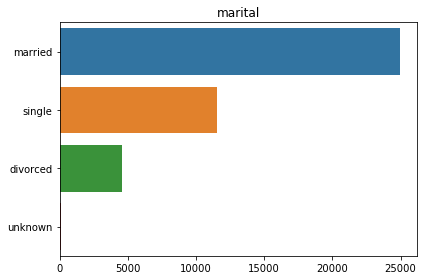

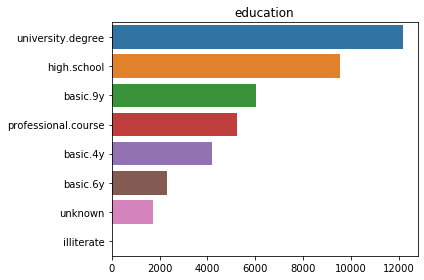

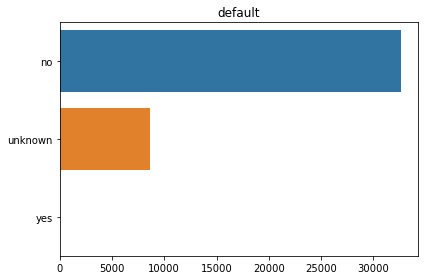

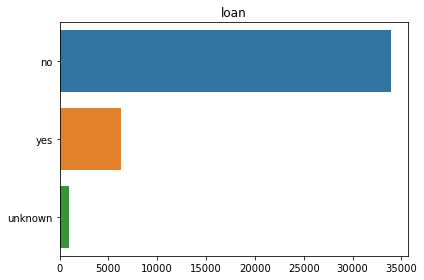

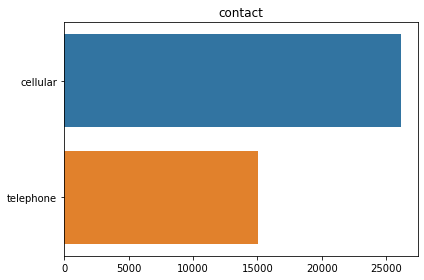

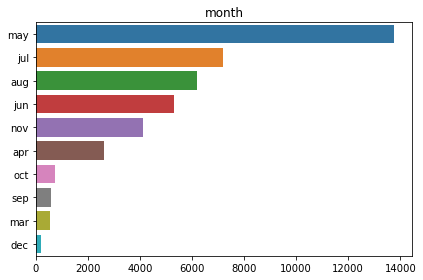

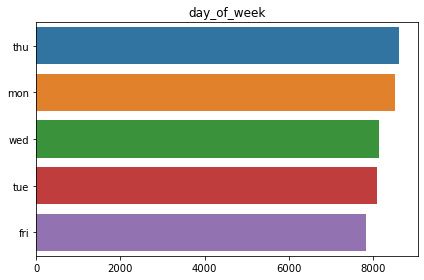

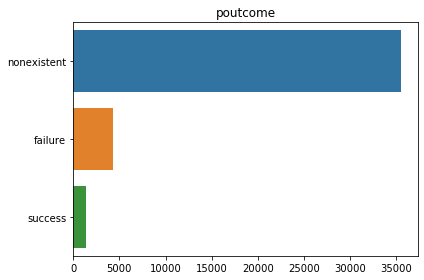

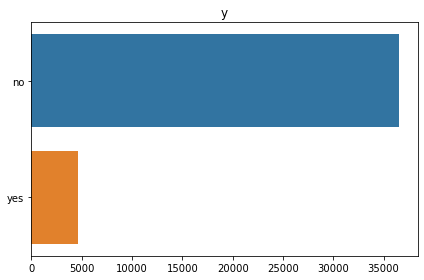

In [175]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(6,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [176]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [177]:
bank["y"].value_counts()/len(bank.y)

no     0.887346
yes    0.112654
Name: y, dtype: float64

88.73% of the observations are No and 11.26 % data as Yes

In [178]:
bank.drop(["duration"] , axis=1,inplace=True)
bank.drop(['contact','month','day_of_week','pdays'],axis=1,inplace=True)
# REplacing the unknown with null


In [179]:
bank.replace('unknown',np.NaN,inplace=True)
bank.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
duration             0
campaign             0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

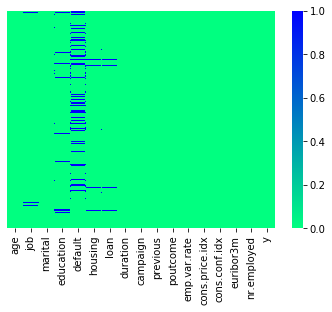

In [180]:
# creating a heatmap to understand the missing range 
sns.heatmap(bank.isnull(),yticklabels=False,cmap="winter_r")


## Preprocessing of the data 


In [149]:
from sklearn import preprocessing



In [183]:
le = preprocessing.LabelEncoder()
bank.head()
label_encoder = preprocessing.LabelEncoder()
bank['job']=label_encoder.fit_transform(bank['job'].astype(str))
bank['marital'] = label_encoder.fit_transform(bank['marital'].astype(str))
bank['education'] = label_encoder.fit_transform(bank['education'].astype(str))
bank['housing'] = label_encoder.fit_transform(bank['housing'].astype(str))
bank['loan'] = label_encoder.fit_transform(bank['loan'].astype(str))
bank.poutcome = label_encoder.fit_transform(bank.poutcome)
bank['y']=label_encoder.fit_transform(bank['y'].astype(str))
bank['default']=label_encoder.fit_transform(bank['default'].astype(str))





In [184]:
bank.head()

,age,job,marital,education,default,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,7,1,0,1,1,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,1,3,0,1,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,1,3,1,2,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,1,1,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,1,3,1,1,2,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [185]:
bank.shape

(41188, 17)

In [188]:
X = bank.iloc[:,0:15]
X[0:10]

,age,job,marital,education,default,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,7,1,0,1,1,1,261,1,0,1,1.1,93.994,-36.4,4.857
1,57,2,1,3,0,1,1,149,1,0,1,1.1,93.994,-36.4,4.857
2,37,2,1,3,1,2,1,226,1,0,1,1.1,93.994,-36.4,4.857
3,40,0,1,1,1,1,1,151,1,0,1,1.1,93.994,-36.4,4.857
4,56,2,1,3,1,1,2,307,1,0,1,1.1,93.994,-36.4,4.857
5,45,2,1,2,0,1,1,198,1,0,1,1.1,93.994,-36.4,4.857
6,59,0,1,6,1,1,1,139,1,0,1,1.1,93.994,-36.4,4.857
7,41,1,1,5,0,1,1,217,1,0,1,1.1,93.994,-36.4,4.857
8,24,4,3,6,1,2,1,380,1,0,1,1.1,93.994,-36.4,4.857
9,25,2,3,3,1,2,1,50,1,0,1,1.1,93.994,-36.4,4.857


In [189]:
y = bank.iloc[:,16]
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

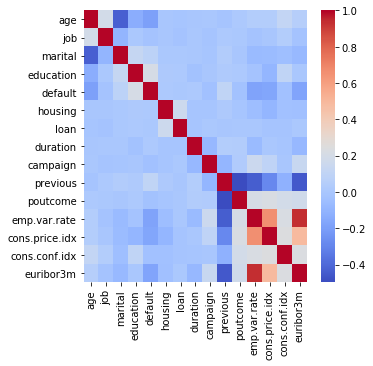

In [190]:
# correlation matrix of predictors
def drawheatmap(df):
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')
drawheatmap(X)

#### Train and Test split

In [191]:
import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [192]:
x_train.shape, y_train.shape

((32950, 15), (32950,))

In [193]:
x_test.shape, y_test.shape

((8238, 15), (8238,))

### Training the model 

In [194]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l2', max_iter=1000)

In [203]:

model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
prediction=model.predict(x_test)

In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9155134741442098

In [198]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [199]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[7142  177]
 [ 519  400]]
